In [9]:
# 1) Design Model (input, output size, forward pass)
# 2) Construct loss and optimiser
# 3) Training loop
#    - forward pass: compute prediction
#    - backward pass: gradients
#    - update weights

import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

epoch: 10, loss = 5134.9458
epoch: 20, loss = 3764.9729
epoch: 30, loss = 2795.0525
epoch: 40, loss = 2106.8374
epoch: 50, loss = 1617.4856
epoch: 60, loss = 1268.8472
epoch: 70, loss = 1019.9994
epoch: 80, loss = 842.0729
epoch: 90, loss = 714.6498
epoch: 100, loss = 623.2601


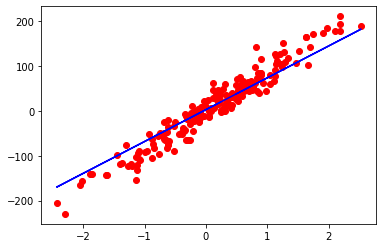

In [28]:
# 0) prepare data
X_numpy, Y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
Y = torch.from_numpy(Y_numpy.astype(np.float32))

Y = Y.view(Y.shape[0], 1)

n_samples, n_features = X.shape

# 1) model
learning_rate = 0.01
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2) loss and optimiser
criterion = nn.MSELoss()
optimiser = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) training loop
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, Y)

    # backward pass
    loss.backward()

    # update
    optimiser.step()

    optimiser.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, Y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()